In [1]:
import numpy as np
import pandas as pd
import scipy

In [2]:
from ecoevocrm.consumer_resource_system import *
from ecoevocrm.consumer_resource_system import *
import ecoevocrm.utils as utils
import ecoevocrm.viz as viz
import ecoevocrm.coarse_graining as cg
import ecoevocrm.strain_pool

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

----

## Model parameters

### Traits

In [4]:
L = 10

In [5]:
sigma_allphenos = utils.binary_combinations(L, exclude_all_zeros=True)
sigma_allphenos = sigma_allphenos/sigma_allphenos.sum(axis=1, keepdims=1)

In [6]:
sigma = sigma_allphenos[0]

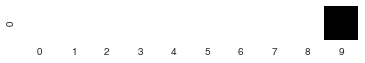

In [7]:
viz.matrix_plot(sigma)

### Costs

In [8]:
chi = 0.4

In [9]:
xi = 0.1

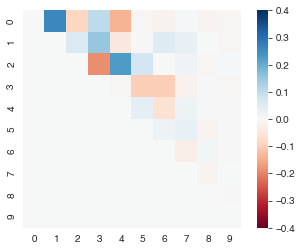

In [10]:
J = utils.random_matrix((L, L), 'tikhonov_sigmoid', args={'n_star': 5, 'delta': 1}, triangular=True, diagonal=0)
viz.matrix_plot(J, vmin=-0.4, vmax=0.4)
# J = None

### Environment

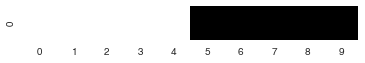

In [11]:
R_init = np.ones(L)
R_init[:5] = 0
viz.matrix_plot(R_init)

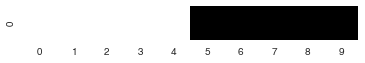

In [12]:
rho = np.ones(L)
rho[:5] = 0
viz.matrix_plot(rho)

In [13]:
tau = 1

### Cross-feeding

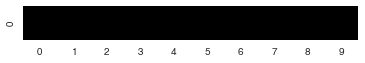

In [14]:
omega = np.ones(L)
# omega[:5] = 
viz.matrix_plot(omega, vmin=0)

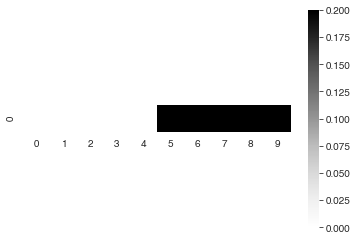

In [15]:
lamda = np.zeros(L)
lamda[5:] = 0.2
viz.matrix_plot(lamda, vmin=0)

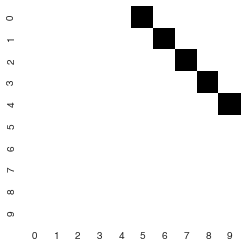

In [16]:
D = utils.random_matrix((L, L), 'binomial', args={'p': 0.0}, diagonal=0)
D += np.diag(np.array([1]*5), 5)
viz.matrix_plot(D)

## Simulate model

In [17]:
system = ConsumerResourceSystem(type_set=TypeSet(sigma=sigma, lamda=lamda, xi=xi, chi=chi, J=J, binarize_traits_J_cost_terms=True, mu=1e-10), 
                                rho=rho, tau=tau, omega=omega, D=D,
                                N_init=1, R_init=R_init, 
                                resource_influx_mode='none', resource_dynamics_mode='explicit', max_time_step=1e3
                                )

In [18]:
T_total = 1e6

In [19]:
system.run(T=T_total)

<AxesSubplot:>

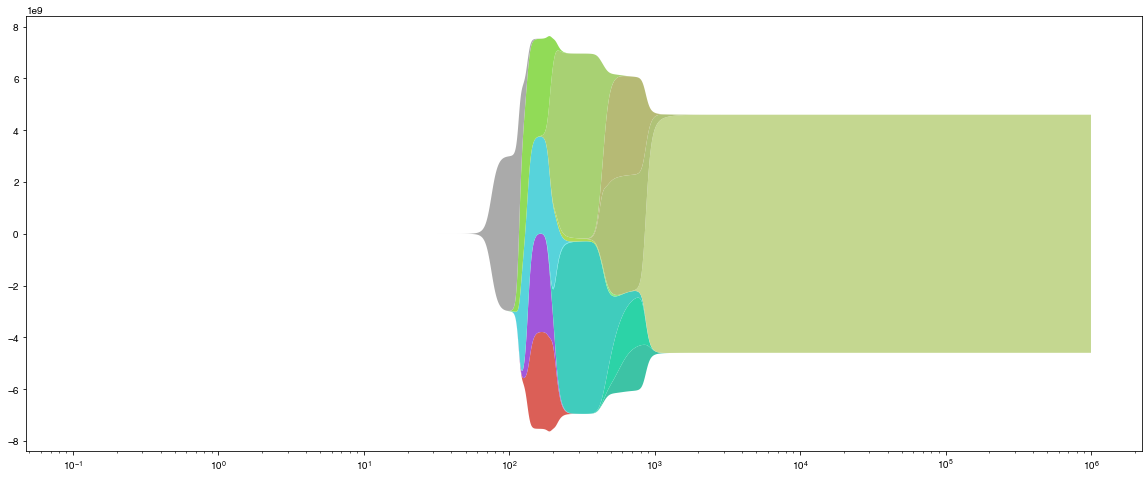

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
viz.stacked_abundance_plot(system, ax=ax, relative_abundance=False, apply_palette_depth=1, log_x_axis=True)

<AxesSubplot:>

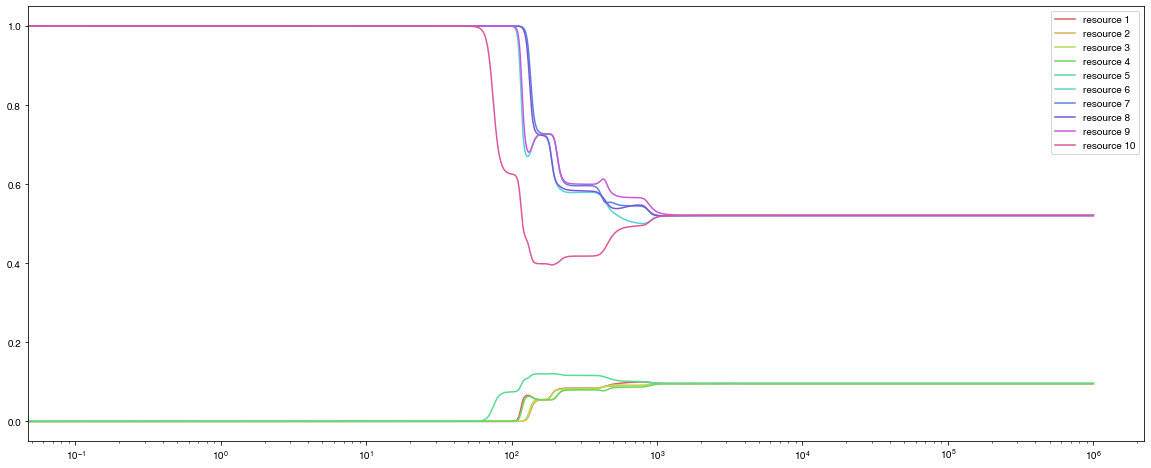

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
viz.resource_plot(system, ax=ax, stacked=False, relative=False, log_x_axis=True, log_y_axis=False)

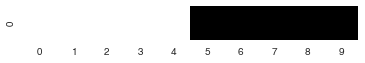

In [22]:
viz.matrix_plot(system.extant_type_set.sigma)

---------
---------

In [23]:
system.t_series

array([0.00000000e+00, 0.00000000e+00, 1.05514665e-01, ...,
       9.99440284e+05, 1.00044028e+06, 1.00085447e+06])

In [24]:
np.diff(system.t_series)

array([0.00000000e+00, 1.05514665e-01, 1.05514665e-01, ...,
       1.00000000e+03, 1.00000000e+03, 4.14186883e+02])

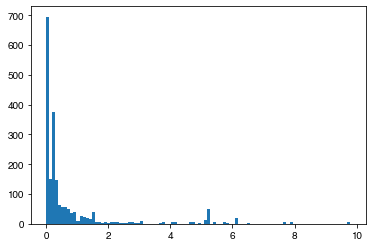

In [25]:
plt.hist(np.diff(system.t_series)[np.diff(system.t_series) < 1e1], bins=100)
plt.show()

In [26]:
np.count_nonzero(np.diff(system.t_series) < 1e3)/len(np.diff(system.t_series))

0.6936740417575569

---------
---------

In [453]:
T  = 1e6
dt = 1
t_series = np.arange(0, T, step=dt)

In [466]:
l   = 1e0
k   = 1e-5
eps = 5e-4

In [467]:
x0   = 1
x    = np.zeros_like(t_series)
x[0] = x0

v0   = 0
v    = np.zeros_like(t_series)
v[0] = v0

In [468]:
for t in range(len(t_series)-1):
    dv = -l*v[t] + np.random.normal(0, eps) - k*(x[t]-x[0])
    v[t+1] = v[t] + dv*dt
    dx = v[t+1]
    x[t+1] = x[t] + dx*dt

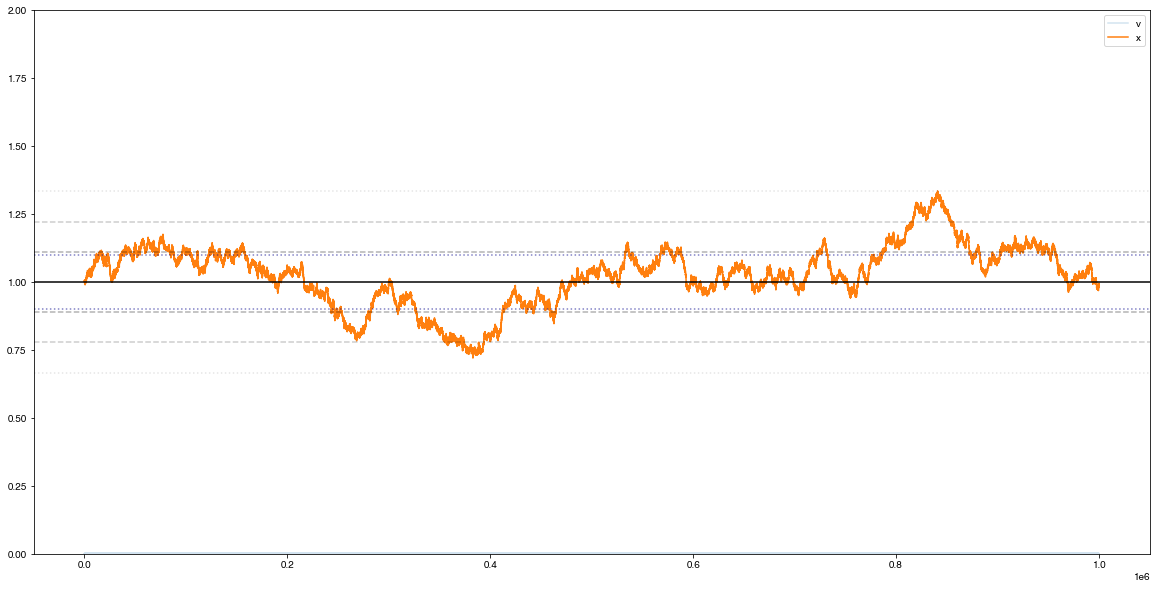

In [469]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))
ax.plot(t_series, v, alpha=0.2, label='v')
ax.plot(t_series, x, label='x')
ax.legend()
ax.set_ylim(0, 2)
ax.axhline(x[0], color='k', alpha=1, ls='-')
ax.axhline(0.9, color='darkblue', alpha=0.5, ls=':')
ax.axhline(1.1, color='darkblue', alpha=0.5, ls=':')
ax.axhline(x[0]+np.std(x), color='k', alpha=0.3, ls='--')
ax.axhline(x[0]-np.std(x), color='k', alpha=0.3, ls='--')
ax.axhline(x[0]+2*np.std(x), color='k', alpha=0.2, ls='--')
ax.axhline(x[0]-2*np.std(x), color='k', alpha=0.2, ls='--')
ax.axhline(x[0]+3*np.std(x), color='k', alpha=0.1, ls=':')
ax.axhline(x[0]-3*np.std(x), color='k', alpha=0.1, ls=':')

In [580]:
T  = 1e6
dt = 1000
t_series = np.arange(0, T, step=dt)

In [632]:
l   = 1e-3
k   = 1e-8
eps = 1e-8

In [633]:
x0   = 1
x    = np.zeros_like(t_series)
x[0] = x0

v0   = 0
v    = np.zeros_like(t_series)
v[0] = v0

In [634]:
for t in range(len(t_series)-1):
    dv = -l*v[t] + np.random.normal(0, eps) - k*(x[t]-x[0])
    v[t+1] = v[t] + dv*dt
    dx = v[t+1]
    x[t+1] = x[t] + dx*dt

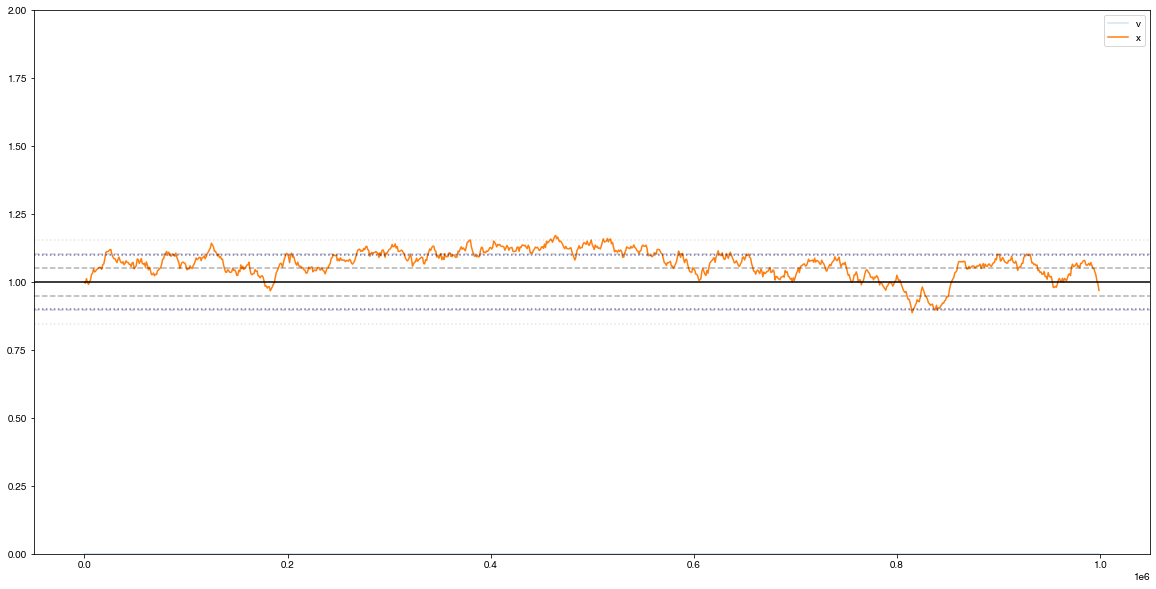

In [635]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))
ax.plot(t_series, v, alpha=0.2, label='v')
ax.plot(t_series, x, label='x')
ax.legend()
ax.set_ylim(0, 2)
ax.axhline(x[0], color='k', alpha=1, ls='-')
ax.axhline(0.9, color='darkblue', alpha=0.5, ls=':')
ax.axhline(1.1, color='darkblue', alpha=0.5, ls=':')
ax.axhline(x[0]+np.std(x), color='k', alpha=0.3, ls='--')
ax.axhline(x[0]-np.std(x), color='k', alpha=0.3, ls='--')
ax.axhline(x[0]+2*np.std(x), color='k', alpha=0.2, ls='--')
ax.axhline(x[0]-2*np.std(x), color='k', alpha=0.2, ls='--')
ax.axhline(x[0]+3*np.std(x), color='k', alpha=0.1, ls=':')
ax.axhline(x[0]-3*np.std(x), color='k', alpha=0.1, ls=':')

In [613]:
T  = 1e6
dt = 1000
t_series = np.arange(0, T, step=dt)

In [614]:
l   = 1e-3
k   = 1e-8
eps = 1e-8

1
2
3
4
5
6
7
8
9
10


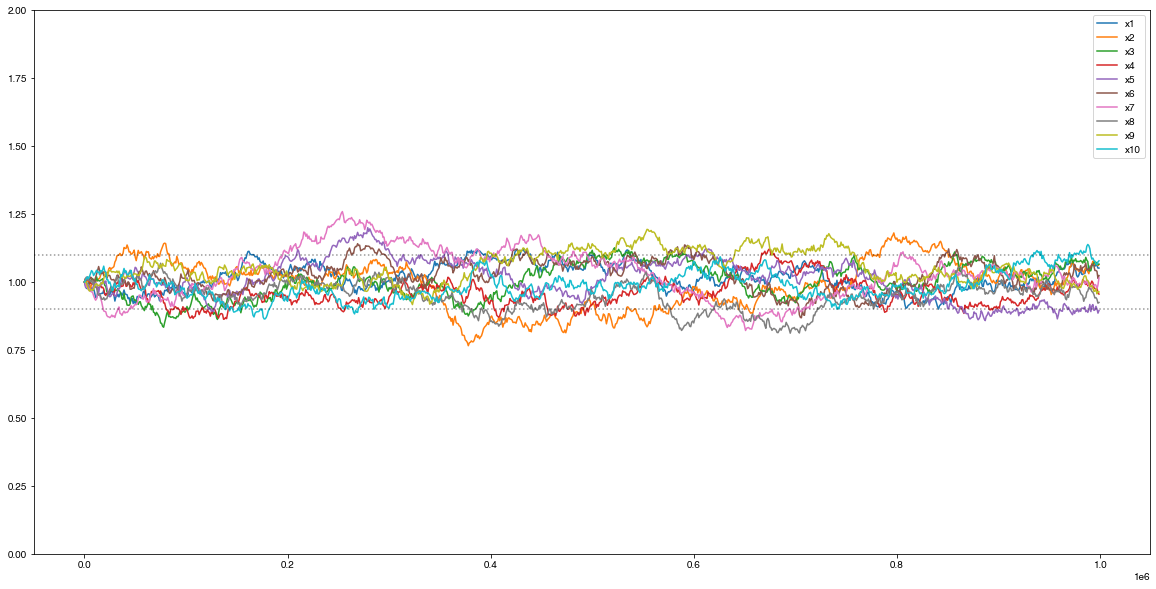

In [615]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))

for i in range(L):
    print(i+1)
    
    x0   = 1
    x    = np.zeros_like(t_series)
    x[0] = x0

    v0   = 0
    v    = np.zeros_like(t_series)
    v[0] = v0

    for t in range(len(t_series)-1):
        dv = -l*v[t] + np.random.normal(0, eps) - k*(x[t]-x[0])
        v[t+1] = v[t] + dv*dt
        dx = v[t+1]
        x[t+1] = x[t] + dx*dt
        
    ax.plot(t_series, x, label=f"x{i+1}")

ax.legend()
ax.set_ylim(0, 2)
ax.axhline(0.9, color='k', alpha=0.4, ls=':')
ax.axhline(1.1, color='k', alpha=0.4, ls=':')